In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\data_analysis\project_4\amazon.csv", encoding = 'ISO-8859-1')

In [7]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [8]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [9]:
df.shape

(6454, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [11]:
df['date']=pd.to_datetime(df['date'])

In [18]:
#check duplicated
df.duplicated().sum()
df= df.drop_duplicates()

0

In [19]:
#check null
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [20]:
df.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


In [21]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [23]:
#changing month column to valid month name
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [26]:
df['month_new']=df['month'].map({
    'Janeiro':'jan',
    'Fevereiro' :'feb',
    'Março':'march',
    'Abril':'april',
    'Maio':'may',
    'Junho':'june',
    'Julho':'july',
    'Agosto':'august',
    'Setembro':'september',
    'Outubro':'october',
    'Novembro':'nov',
    'Dezembro':'dec',
    
})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2952\774151725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_new']=df['month'].map({


In [28]:
df.drop(columns=['month'],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2952\1542109320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['month'],inplace=True)


In [29]:
df.head()

,year,state,number,date,month_new
0,1998,Acre,0.0,1998-01-01,jan
1,1999,Acre,0.0,1999-01-01,jan
2,2000,Acre,0.0,2000-01-01,jan
3,2001,Acre,0.0,2001-01-01,jan
4,2002,Acre,0.0,2002-01-01,jan


In [ ]:
#In Which Month Maximum Number of Forest Fires Were Reported?

<AxesSubplot:xlabel='month_new', ylabel='number'>

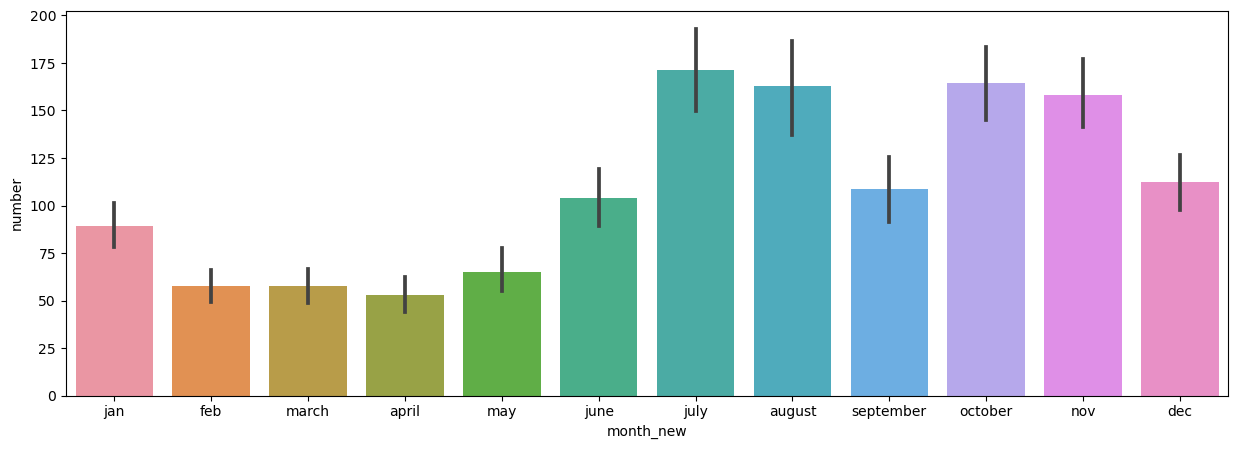

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x='month_new',y='number',data=df)

In [42]:
df.groupby('month_new')['number'].sum().sort_values(ascending=False)

month_new
july         92319.113
october      88681.579
august       88050.435
nov          85508.054
september    58578.305
dec          57535.480
june         55997.675
jan          47681.844
may          34725.363
feb          30839.050
march        30709.405
april        28184.770
Name: number, dtype: float64

<AxesSubplot:xlabel='number', ylabel='year'>

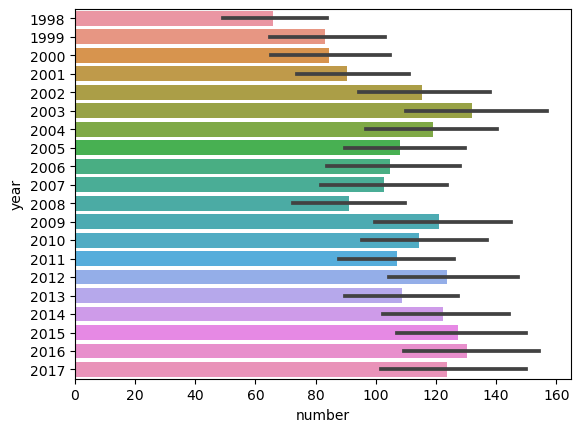

In [45]:
#In Which Year Maximum Number of Forest Fires Was Reported?
sns.barplot(x='number',y='year',data=df,orient='h')

In [47]:
df.groupby('year')['number'].sum().sort_values(ascending=False)

year
2003    42760.674
2016    42212.229
2015    41208.292
2012    40084.860
2014    39621.183
2009    39116.178
2004    38450.163
2002    37390.600
2010    37037.449
2017    36619.624
2013    35137.118
2005    35004.965
2011    34633.545
2006    33824.161
2007    33028.413
2008    29378.964
2001    29054.612
2000    27351.251
1999    26882.821
1998    20013.971
Name: number, dtype: float64

<AxesSubplot:xlabel='number', ylabel='state'>

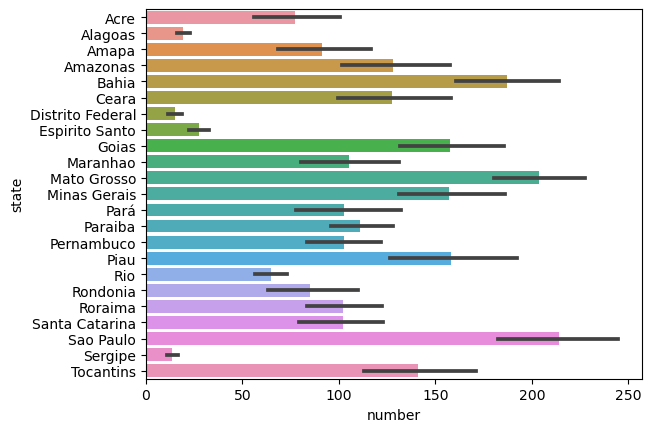

In [50]:
#In Which State Maximum Number of Forest Fires Was Reported?
sns.barplot(x='number',y='state',data=df)

In [49]:
df.groupby('state')['number'].sum().sort_values(ascending=False)

state
Mato Grosso         96246.028
Paraiba             52426.918
Sao Paulo           51121.198
Rio                 45094.865
Bahia               44746.226
Piau                37803.747
Goias               37695.520
Minas Gerais        37475.258
Tocantins           33707.885
Amazonas            30650.129
Ceara               30428.063
Maranhao            25129.131
Pará                24512.144
Pernambuco          24498.000
Roraima             24385.074
Santa Catarina      24359.852
Amapa               21831.576
Rondonia            20285.429
Acre                18464.030
Espirito Santo       6546.000
Alagoas              4606.000
Distrito Federal     3561.000
Sergipe              3237.000
Name: number, dtype: float64

In [51]:
#Find Total Number of Fires Were Reported In Amazonas
df.columns

Index(['year', 'state', 'number', 'date', 'month_new'], dtype='object')

In [59]:
df[df['state']=='Amazonas']['number'].sum()

30650.129

In [65]:
# Display Number of Fires Were Reported In Amazonas (Year-Wise)
df[df['state']=='Amazonas'].groupby('year')['number'].sum().sort_values(ascending=False)

year
2002    2852.000
2008    2717.000
2014    2385.909
2010    2324.508
2004    2298.207
2016    2060.972
2005    1657.128
2011    1652.538
2003    1524.268
2009    1320.601
2001    1297.000
2015    1189.994
2012    1110.641
1999    1061.000
2006     997.640
1998     946.000
2017     906.905
2013     905.217
2000     853.000
2007     589.601
Name: number, dtype: float64

In [68]:
#Display Number of Fires Were Reported In Amazonas (Day-Wise)
df.columns

Index(['year', 'state', 'number', 'date', 'month_new'], dtype='object')

In [73]:
df[df['state']=="Amazonas"].groupby(df['date'].dt.dayofweek).sum()['number']

date
0    1886.601
1    6474.217
2    3910.177
3    5754.802
4    5446.480
5    4162.666
6    3015.186
Name: number, dtype: float64

In [81]:
#Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’
df[df['year']==2015].groupby('month_new')['number'].sum().sort_values(ascending=False)

month_new
jan          4635.000
october      4499.525
july         4364.392
august       4363.125
dec          4088.522
nov          4034.518
june         3260.552
april        2573.000
september    2494.658
may          2384.000
feb          2309.000
march        2202.000
Name: number, dtype: float64

<AxesSubplot:xlabel='month_new', ylabel='number'>

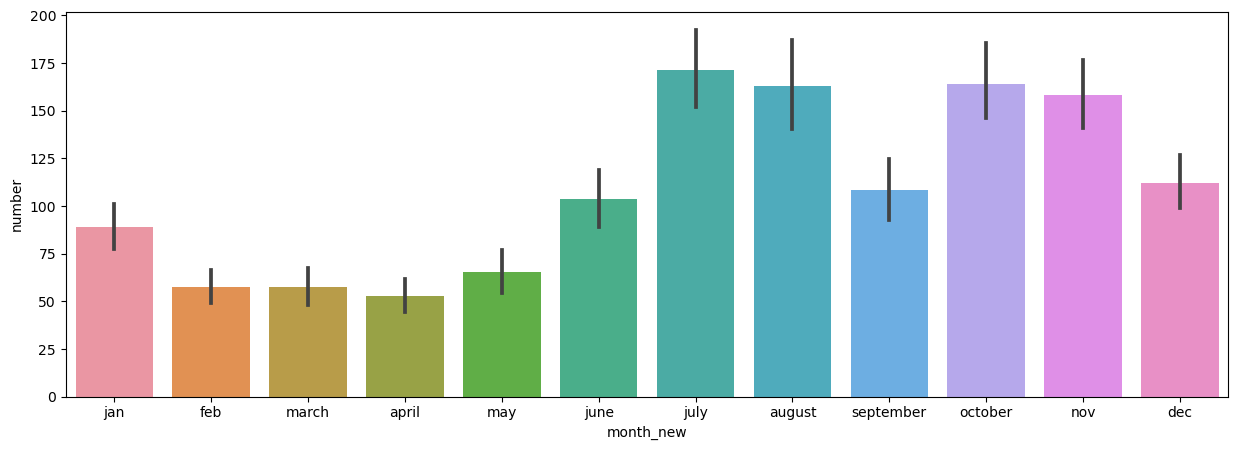

In [85]:
plt.figure(figsize=(15,5))
sns.barplot(x='month_new',y='number',data=df)
